# **Bagging & Boosting KNN & Stacking**

**Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?**

*Answer*

Fundamental Idea Behind Ensemble Techniques
Ensemble learning is a machine learning approach where multiple models (called base learners) are combined to solve the same problem, aiming to achieve better predictive performance than any single model could alone. The intuition is that by aggregating the diverse predictions of several models, we can reduce the weaknesses or errors that individual models might have. This results in greater stability, accuracy, and generalization.

Bagging (Bootstrap Aggregating)


Approach: Bagging trains multiple models in parallel on different random subsets of the training data, drawn with replacement (called bootstrap samples). Each model is trained independently.​

Objective: The main goal of bagging is to reduce variance—that is, to make models less sensitive to fluctuations in the training data and thus reduce overfitting. Predictions from all models are combined by averaging (for regression) or majority voting (for classification)

Example: Random Forest is the most common bagging-based algorithm.

Boosting

Approach: Boosting trains models sequentially, where each new model is trained to correct the errors made by the previous ones. The algorithm gives higher weights to misclassified instances, focusing more on harder-to-learn examples in each subsequent model.

Objective: The goal of boosting is to reduce bias (and sometimes variance) by creating a strong predictive model from many weak learners. Boosting emphasizes adaptability and often achieves higher accuracy, though it can risk overfitting if not carefully tuned.

Example: AdaBoost, Gradient Boosting, XGBoost are well-known boosting algorithms.

Bagging stabilizes high-variance models to prevent overfitting, while boosting builds sequences of models that learn from errors, reducing bias and improving accuracy.

**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.**

*Answer*

Random Forest is an ensemble method that builds multiple decision trees and aggregates their predictions, unlike a single decision tree which relies on just one model.

Why Single Decision Trees Overfit

A single decision tree can become very deep and complex, capturing noise and exact patterns in training data.

This leads to overfitting, where the tree performs well on training data but poorly on unseen data.

How Random Forest Mitigates Overfitting
Ensemble averaging: Random Forest averages the predictions of many independent trees, which reduces the influence of noisy or overfitted trees.

Randomness: It introduces randomness in two key ways:

Each tree is trained on a different bootstrap sample (random subset with replacement) of the data.

At each split in a tree, only a random subset of features is considered (called feature bagging), which decreases correlation among trees.

This randomness and aggregation lead to trees that are diverse and less correlated, helping the model generalize better to new data.

Two Key Hyperparameters and Their Roles
Number of Trees (n_estimators):

More trees generally improve performance by stabilizing predictions and further reducing variance.

However, too many trees increase computation cost without much gain.

Number of Features per Split (max_features):

Limits the number of features considered at each split, increasing diversity among trees.

Smaller values reduce correlation between trees and help prevent overfitting.



**Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.**

*Answer*

What is Stacking in Ensemble Learning
Stacking (short for Stacked Generalization) is an ensemble learning technique where multiple machine learning models (called base learners) are trained on the same dataset, and a separate model called a meta-learner is trained to combine their predictions into a final output.

Simple Example Use Case
Imagine you’re building a model to predict whether a loan applicant will default:

You train three base models:

A Decision Tree (captures non-linear relationships)

A Logistic Regression (good for linear patterns)

A Random Forest (powerful ensemble tree model)

You then feed their individual predictions (e.g., probabilities) into a meta-learner—say, a Logistic Regression model.

The meta-learner learns how to combine these predictions optimally. For instance, it might learn that the logistic model is more reliable when applicant income is high, while the Random Forest works better for complex low-income applicant profiles.

In the end, stacking can capture the complementary strengths of each model to yield more accurate predictions than any single method.

Stacking is a layered ensemble method that uses different models at the base level and a meta-learner to combine them intelligently, unlike bagging or boosting, which use multiple similar models either in parallel or sequentially.

**Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?**

*Answer*

The Out-of-Bag (OOB) score is an internal performance metric used by Random Forests that estimates how well the model generalizes to unseen data. It leverages the fact that each tree in the forest is trained on a bootstrap sample—a random subset of the training data drawn with replacement, usually about 67% of the data.

The remaining approximately 33% of the data not used in training a particular tree is called the out-of-bag samples for that tree. These samples serve as a kind of "left-out" data for that tree.

Why is the OOB Score Useful?
The OOB score is computed by predicting the out-of-bag samples using only the trees that did not see those samples during training.

By aggregating these predictions over all data points, the OOB score gives an unbiased estimate of the model’s prediction error without needing a separate validation set.

This means you don't have to split your dataset into training and validation sets, saving more data for training.

It provides a fast and convenient way to evaluate model performance during training.

How Does OOB Help in Model Evaluation Without a Validation Set?
Because each data point is "left out" of the training for some trees (its OOB trees), that point can be predicted independently by those trees. This acts like a cross-validation within the training process:

Each sample's prediction comes from trees that were not trained on it.

Combining these predictions over all samples gives an estimation of generalization error.

It allows model evaluation and parameter tuning using only training data.



Question 5: Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

*Answer*

### Comparing AdaBoost and Gradient Boosting

| Aspect | AdaBoost | Gradient Boosting |
|---|---|---|
| **Handling Errors from Weak Learners** | Adjusts weights on training samples by increasing weights for misclassified samples, forcing new learners to focus on those difficult cases. | Fits each new learner to the residual errors (negative gradients) of the ensemble's current predictions, optimizing a loss function iteratively.
|
| **Weight Adjustment Mechanism** | Explicitly updates sample weights to emphasize misclassified points; assigns weight (alpha) to each weak learner based inversely on its error rate. | Uses gradient descent to minimize a chosen differentiable loss by fitting learners to gradients (residuals); combines learners with a learning rate but no explicit sample reweighting.
|
| **Typical Use Cases** | Works well with simple weak learners like decision stumps and cleaner datasets; converges faster on simpler problems. | More flexible and powerful for complex datasets and stronger base learners; widely used in regression and classification with customizable loss functions and regularization.

***


AdaBoost focuses on adjusting training data weights to fix errors, while Gradient Boosting focuses on optimizing prediction errors via gradients of a loss function. AdaBoost reweights samples and learners explicitly, whereas Gradient Boosting sequentially fits learners to residuals using gradient descent.

**Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variable**.

*Answer*

CatBoost performs well on categorical features without requiring extensive preprocessing because it uses a specialized method to handle them internally. Instead of relying solely on traditional encoding techniques like one-hot encoding or label encoding, CatBoost employs a process known as ordered target statistics encoding combined with random permutations. This method calculates statistics for categorical features based on the target variable but does so using a carefully designed scheme that avoids target leakage and overfitting.

Additionally, CatBoost can automatically combine categorical features to capture complex interactions without manual feature engineering. It also limits one-hot encoding to categorical features with a small number of unique values, thus controlling dimensionality.

This approach allows practitioners to provide raw categorical data directly to the model using the cat_features parameter, simplifying the preprocessing pipeline, reducing manual encoding errors, and improving predictive performance on datasets containing categorical variables.

Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.


In [2]:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# 2. Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train KNN classifier (K=5 default) without scaling and evaluate
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN without scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Apply StandardScaler, retrain KNN, and compare metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\nKNN with scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 5. Use GridSearchCV to find the best K (1 to 20) and distance metric (Euclidean, Manhattan)
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nGridSearchCV best parameters:", best_params)
print("Best cross-validation accuracy:", best_score)

# Evaluate best estimator on test set
best_knn = grid_search.best_estimator_
y_best_pred = best_knn.predict(X_test_scaled)

print("\nBest KNN on test set:")
print("Accuracy:", accuracy_score(y_test, y_best_pred))
print("Classification Report:\n", classification_report(y_test, y_best_pred))


KNN without scaling:
Accuracy: 0.7407407407407407
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


KNN with scaling:
Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


GridSearchCV best parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best cross-validati

Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).


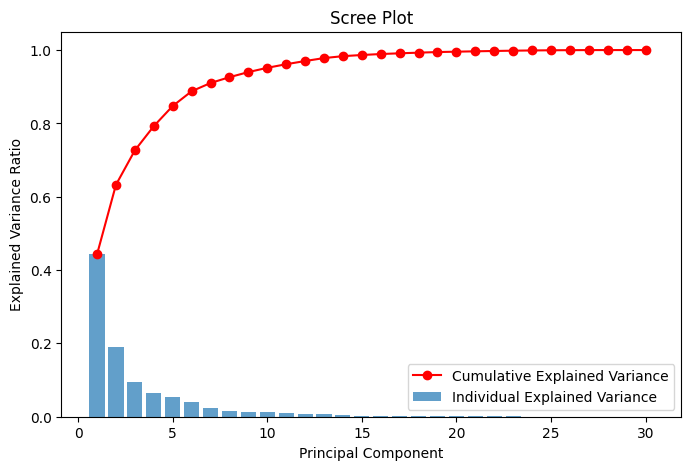

KNN accuracy on original data: 0.9591
KNN accuracy on PCA-transformed data (95% variance retained): 0.9649


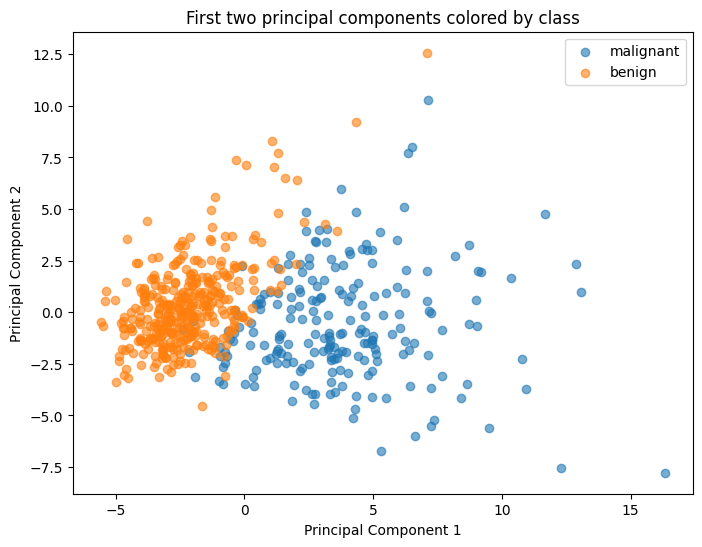

In [3]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA and plot scree plot (explained variance ratio)
pca = PCA().fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(),
         marker='o', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

# 4. Retain 95% variance and transform dataset
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

# 5. Split both original and PCA datasets into train and test sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 6. Train KNN on original data and evaluate
knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test, y_pred_orig)

# 7. Train KNN on PCA-transformed data and evaluate
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"KNN accuracy on original data: {acc_orig:.4f}")
print(f"KNN accuracy on PCA-transformed data (95% variance retained): {acc_pca:.4f}")

# 8. Visualize first two principal components colored by class
plt.figure(figsize=(8,6))
for class_label in [0, 1]:
    plt.scatter(X_pca[y == class_label, 0], X_pca[y == class_label, 1], label=data.target_names[class_label], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two principal components colored by class')
plt.legend()
plt.show()

Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


Euclidean Distance K=5: MSE = 4803.906
Manhattan Distance K=5: MSE = 5210.226


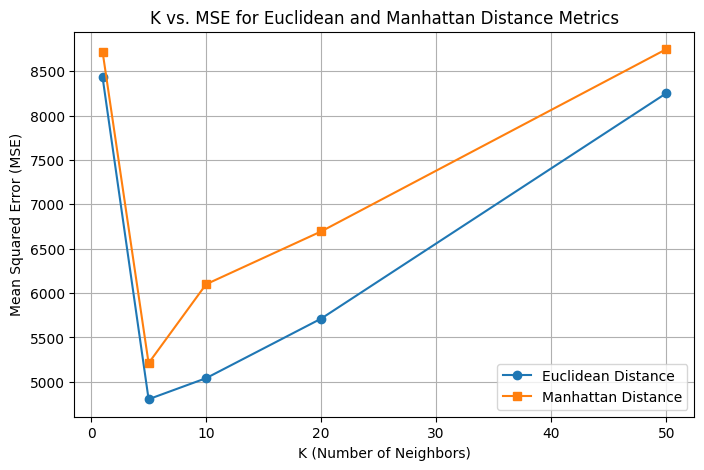

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2a. Train KNN with Euclidean distance (default metric)
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_euc.fit(X_train, y_train)
y_pred_euc = knn_euc.predict(X_test)
mse_euc = mean_squared_error(y_test, y_pred_euc)

# 2b. Train KNN with Manhattan distance
knn_man = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1)
knn_man.fit(X_train, y_train)
y_pred_man = knn_man.predict(X_test)
mse_man = mean_squared_error(y_test, y_pred_man)

print(f"Euclidean Distance K=5: MSE = {mse_euc:.3f}")
print(f"Manhattan Distance K=5: MSE = {mse_man:.3f}")

# 3. Analyze MSE for different K values and plot
k_values = [1, 5, 10, 20, 50]
mse_euc_list = []
mse_man_list = []

for k in k_values:
    knn_euc = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    knn_euc.fit(X_train, y_train)
    mse_euc_list.append(mean_squared_error(y_test, knn_euc.predict(X_test)))

    knn_man = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=1)
    knn_man.fit(X_train, y_train)
    mse_man_list.append(mean_squared_error(y_test, knn_man.predict(X_test)))

plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_euc_list, label='Euclidean Distance', marker='o')
plt.plot(k_values, mse_man_list, label='Manhattan Distance', marker='s')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs. MSE for Euclidean and Manhattan Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes

Unique values in target variable: ['tested_positive', 'tested_negative']
Categories (2, object): ['tested_negative', 'tested_positive']
KNN Algorithm Performance:
brute: Training Time = 0.0008 seconds, Accuracy = 0.7359
kd_tree: Training Time = 0.0015 seconds, Accuracy = 0.7359
ball_tree: Training Time = 0.0013 seconds, Accuracy = 0.7359

Best Algorithm: brute
Data type of Z after predict: int64
Data type of Z after conversion: float64


/tmp/ipython-input-2791932624.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X[feature].replace(0, np.nan)


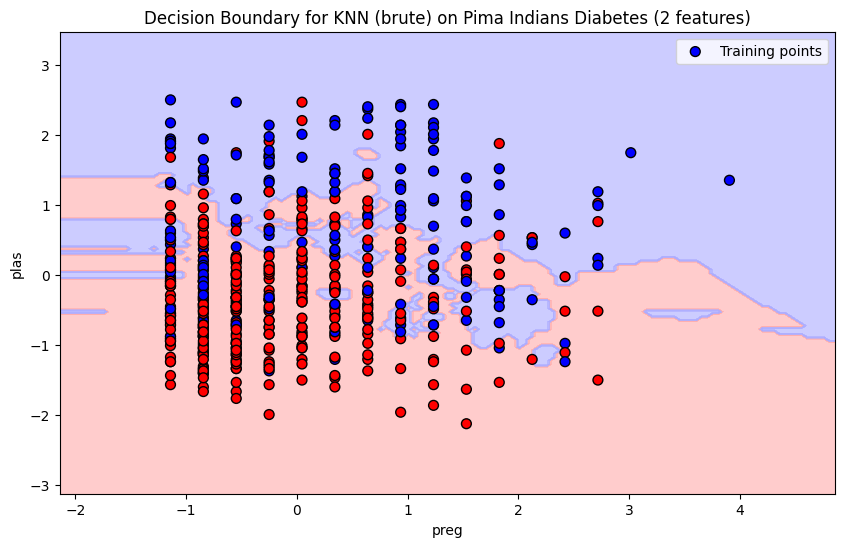

In [19]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Load Pima Indians Diabetes dataset
pima = fetch_openml(name='diabetes', version=1, as_frame=True)
X = pima.data
y = pima.target  # Keep target as is for now

# Check unique values in the target variable
print("Unique values in target variable:", y.unique())

# Convert target to int if necessary by mapping string values
# Assuming 'tested_positive' maps to 1 and 'tested_negative' maps to 0
if y.dtype == 'object' or y.dtype.name == 'category':
    y = y.map({'tested_negative': 0, 'tested_positive': 1}).astype(int)

# Check and identify missing values - in this dataset zeros in some features imply missing
# Replace zeros in certain columns with np.nan to treat as missing
features_with_missing = ['plas', 'pres', 'skin', 'insu', 'mass']
for feature in features_with_missing:
    X[feature] = X[feature].replace(0, np.nan)

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Ensure y_train and y_test are of integer type after the split
y_train = y_train.values.astype(int)
y_test = y_test.values.astype(int)


# Define KNN configurations
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

# Train and evaluate each KNN algorithm & record training time and accuracy
for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = {'time': train_time, 'accuracy': acc}

# Identify best-performing algorithm
best_algo = max(results, key=lambda k: results[k]['accuracy'])
best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_knn.fit(X_train, y_train)

print("KNN Algorithm Performance:")
for algo, res in results.items():
    print(f"{algo}: Training Time = {res['time']:.4f} seconds, Accuracy = {res['accuracy']:.4f}")

print(f"\nBest Algorithm: {best_algo}")

# Visualize decision boundary for best algorithm using two most important features
# For simplicity, select first two features after scaling
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

knn_2d = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_2d.fit(X_train_2d, y_train)

# Plotting decision boundary
h = .05  # step size in the mesh
import matplotlib.colors as colors
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
print(f"Data type of Z after predict: {Z.dtype}")

# Explicitly convert Z to a NumPy array with float dtype
Z = np.array(Z, dtype=float).reshape(xx.shape)
print(f"Data type of Z after conversion: {Z.dtype}")


cmap_light = colors.ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = colors.ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=50, label='Training points')
plt.xlabel(pima.feature_names[0])
plt.ylabel(pima.feature_names[1])
plt.title(f'Decision Boundary for KNN ({best_algo}) on Pima Indians Diabetes (2 features)')
plt.legend()
plt.show()